# Introduction to Data Science – Homework 7 - March 22, 2024 
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 22, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classification methods. 

## Your Data
First Name: Logan
<br>
Last Name: Correa
<br>
E-mail: u1094034@umail.utah.edu
<br>
UID: u1094034
<br>

In [2]:
# imports and setup 
#test
import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied on them.

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

1) Classes: 10 (one for each digit)
2) Samples total: 1797
3) Samples per class: $\approx$180
4) Dimensionality: 64 (8 pixels by 8 pixels)
5) Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
#X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))


<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

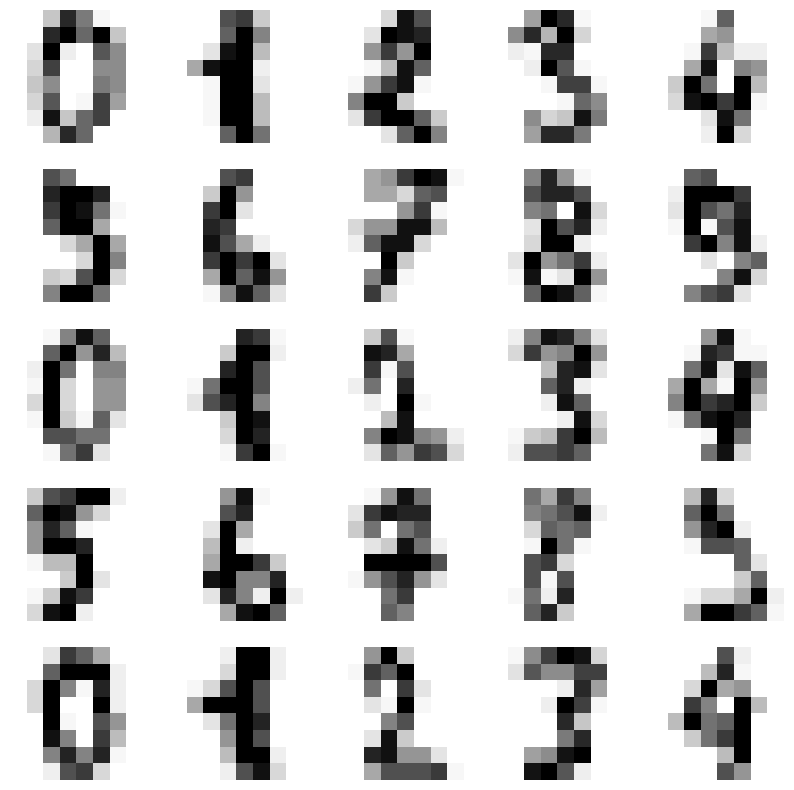

In [4]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to be generally helpful for this exercise. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
    1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
    2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
    3. Print all of these misclassified digits as images. 
    4. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 100. What is the best value? 
    5. Try to train and test the algorithm on the raw (non-scaled) data. Report the accuracy score and confusion matrix for different settings of `gamma`. You may use whatever C value you determined worked well on the scaled data in "part 4" .What is your observation of the results on the raw data?

Accuracy =  0.9534075104311543
Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]


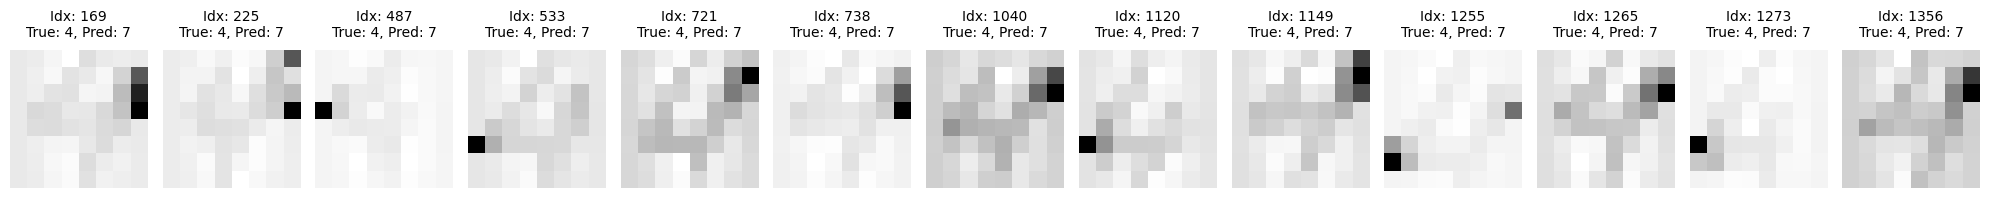

In [43]:
# split data into traing and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

# 1. Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
model = svm.SVC(kernel='rbf', C=100, gamma = 'scale')
model.fit(X_train, y_train)

#2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix.
y_pred = model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

# Print all of these misclassified digits as images. 
# Finding the indexes of the misclassified digits (4 misclassified as 7)
misclassified_indexes = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true == 4 and pred == 7]

# Plotting the misclassified digits
fig, axes = plt.subplots(nrows=1, ncols=len(misclassified_indexes), figsize=(20, 2))

for ax, index in zip(axes, misclassified_indexes):
    ax.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Idx: {index}\nTrue: 4, Pred: 7', fontsize=10, pad=10)
    ax.axis('off')

plt.tight_layout()
plt.show()



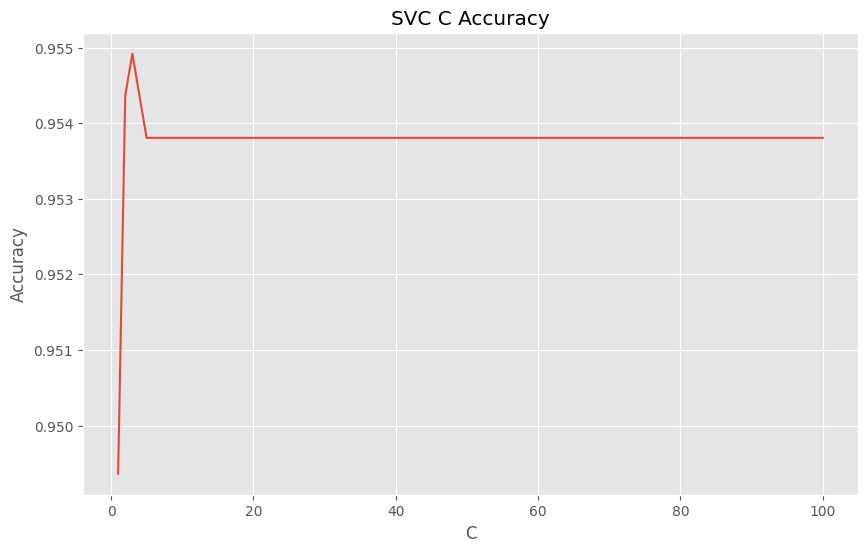

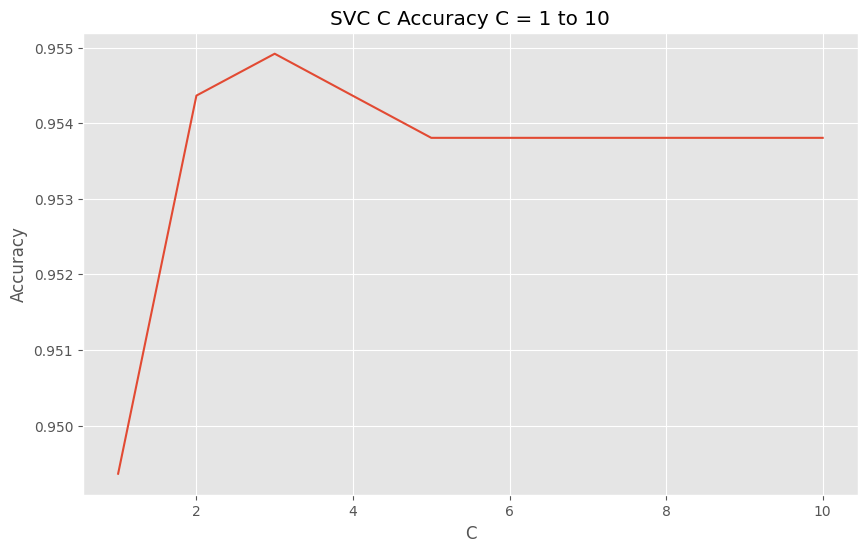

In [69]:
# Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 100. What is the best value? 
Cs = np.linspace(1, 100, 100)
Accuracies = np.zeros(Cs.shape[0])    
for i,C in enumerate(Cs):
    model = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring='accuracy')
    Accuracies[i] = scores.mean()

plt.plot(Cs, Accuracies)
plt.title('SVC C Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

plt.plot(Cs[0:10],Accuracies[0:10])
plt.title('SVC C Accuracy C = 1 to 10')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [42]:
# Try to train and test the algorithm on the raw (non-scaled) data. Report the accuracy score and confusion matrix for different settings of `gamma`. 
# You may use whatever C value you determined worked well on the scaled data in "part 4" .
# What is your observation of the results on the raw data?
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, random_state=1, test_size=0.8)


gamma_values = [0.001, 0.01, 0.1, 1]
for gamma in gamma_values:
    model_raw = svm.SVC(kernel='rbf', C=3, gamma = gamma)
    model_raw.fit(X_train_raw, y_train_raw)
    y_pred_raw = model_raw.predict(X_test_raw)
    print('Gamma = ', gamma)
    print('Accuracy = ', metrics.accuracy_score(y_true = y_test_raw, y_pred = y_pred_raw))
    print('Confusion Matrix:')
    print(metrics.confusion_matrix(y_true = y_test_raw, y_pred = y_pred_raw))
    print('===')


Gamma =  0.001
Accuracy =  0.9714881780250347
Confusion Matrix:
[[129   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   5   0]
 [  0   0 136   0   0   0   0   1   5   0]
 [  0   0   0 140   0   1   0   2   3   1]
 [  0   0   0   0 151   0   0   1   0   0]
 [  0   0   0   0   0 141   1   0   0   5]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   0   1   0   0   0   0 129   0]
 [  0   1   0   3   0   2   0   0   2 144]]
===
Gamma =  0.01
Accuracy =  0.38178025034770513
Confusion Matrix:
[[118   0   0   0   0   0   0   0  12   0]
 [  0  42   0   0   0   0   0   0 107   0]
 [  0   0  34   0   0   0   0   0 108   0]
 [  0   0   0  47   0   0   0   0 100   0]
 [  0   0   0   0  11   0   0   0 141   0]
 [  0   0   0   0   0  24   0   0 123   0]
 [  0   0   0   0   0   0  71   0  75   0]
 [  0   0   0   0   0   0   0  67  73   0]
 [  0   0   0   0   0   0   0   0 133   0]
 [  0   0   0   0   0   0   0   0 150   2]]
===
Ga

**Your Interpretation**:

1. What is the most common mistake that the classifier makes?
    - The most common mistake the classifer made was interpreting the number '4' as '7'.

2. Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 100. What is the best value? 
    - The highest SVM accuracy is C=3.

3. What is your observation of the results on the raw data?  
    - Lower gamma appears more suitable for raw data

### Task 1.2: Prediction with k-nearest neighbors
`Repeat` task 1.1 using k-nearest neighbors (k-NN). In part 2, use k=10. In part 5, find the best value of k. 
Work on every single question except the last one (You don't need to handle the non-scaled data here) in task 1.1 

Accuracy =  0.9123783031988874
Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]


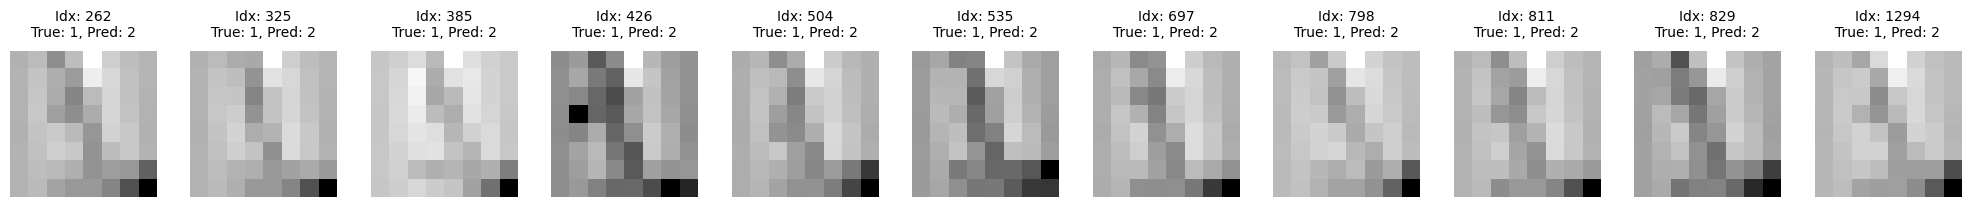

In [65]:
#1. Use KNeighborsClassifier to build a classifier using the *training dataset*.
k = 10 
KNNmodel = KNeighborsClassifier(n_neighbors=k)
KNNmodel.fit(X_train, y_train)

#2. Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? **Note: this corresponds to the largest off-diagonal entry of the confusion matrix.**
y_pred_KNN = KNNmodel.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_KNN))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_KNN))

#3. Print all of these misclassified digits as images. 
# Finding the indexes of the misclassified digits (1 misclassified as 2)
misclassified_indexes_KNN = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_KNN)) if true == 1 and pred == 2]

# Plotting the misclassified digits
fig2, axes2 = plt.subplots(nrows=1, ncols=len(misclassified_indexes_KNN), figsize=(20, 2))

for ax, index in zip(axes2, misclassified_indexes_KNN):
    ax.imshow(X_test[index].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Idx: {index}\nTrue: 1, Pred: 2', fontsize=10, pad=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

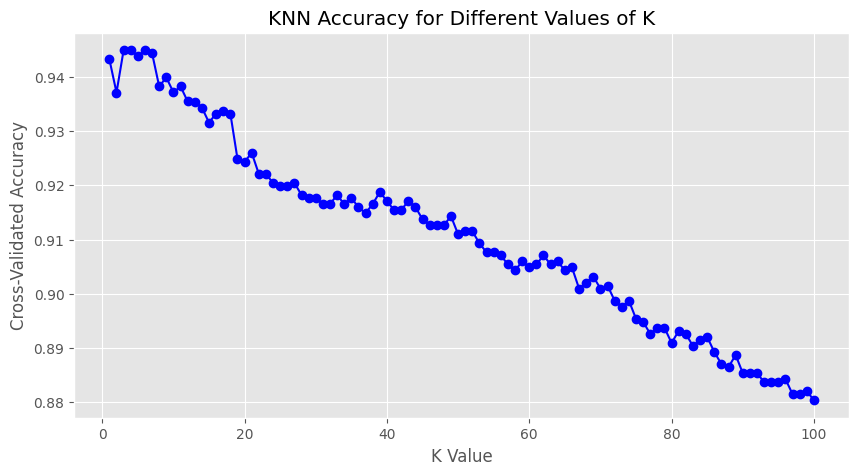

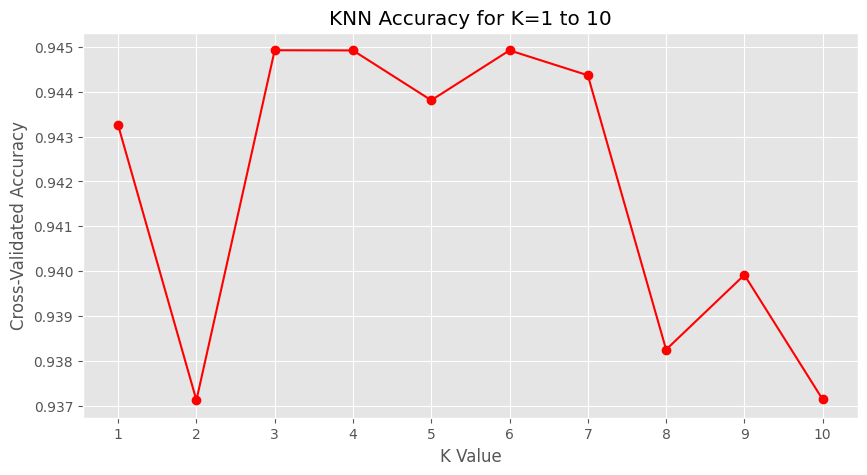

In [67]:
#4. Using the 'cross_val_score' function, find the best value of k for the KNN algorithm.
Ks = np.linspace(1, 100, 100)  # Using 20 different values of k from 1 to 20
Accuracies = np.zeros(Ks.shape[0])

# Evaluating KNN performance for different values of k
for i, k in enumerate(Ks):
    knn = KNeighborsClassifier(n_neighbors=int(k))
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=5, scoring='accuracy')  # 5-fold cross-validation for speed
    Accuracies[i] = scores.mean()

# Plotting accuracies for all evaluated k values
plt.figure(figsize=(10, 5))
plt.plot(Ks, Accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# Zooming in on the first 10 k values
plt.figure(figsize=(10, 5))
plt.plot(Ks[:10], Accuracies[:10], marker='o', linestyle='-', color='r')
plt.title('KNN Accuracy for K=1 to 10')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(Ks[:10])
plt.grid(True)
plt.show()

**Your Interpretation**:

1. What is the most common mistake that the classifier makes?
    - The most common mistake was interpreting '1' as '2'.

2. Using the 'cross_val_score' function, find the best k value 
    - It appears 3,4, and 6 have the highest accuracies for the best k value. 


# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset. Then, **print** shape of the data and first few lines of data.
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.
* Print *y* array

In [3]:
df = pd.read_csv("Popularity/OnlineNewsPopularity.csv")

print(df.shape)
display(df.head())

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Remove url, timedelta, and shares columns and convert to np array
X = df.drop(columns=['url', ' timedelta', ' shares'])
X = X.values

# convert shares to np array
shares = df[' shares']
shares = shares.values

# create binary popularity np array
median_shares = np.median(shares)
y = np.where(shares > median_shares, 1, 0)
print(y)


[0 0 1 ... 1 0 0]


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [95]:
print("Min: " + str(np.min(shares)))
print("Median: " + str(np.median(shares)))
print("Max: " + str(np.max(shares)))

Min: 1
Median: 1400.0
Max: 843300


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 
Plot graph of accuracy with various values of k to show your result.

In [116]:
Ks = np.linspace(1, 50, 50)
Accuracies = np.zeros(Ks.shape[0])

# Evaluating KNN performance for different values of k
for i, k in enumerate(Ks):
    knn = KNeighborsClassifier(n_neighbors=int(k))
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=5, scoring='accuracy')  # 5-fold cross-validation for speed
    Accuracies[i] = scores.mean()

KeyboardInterrupt: 

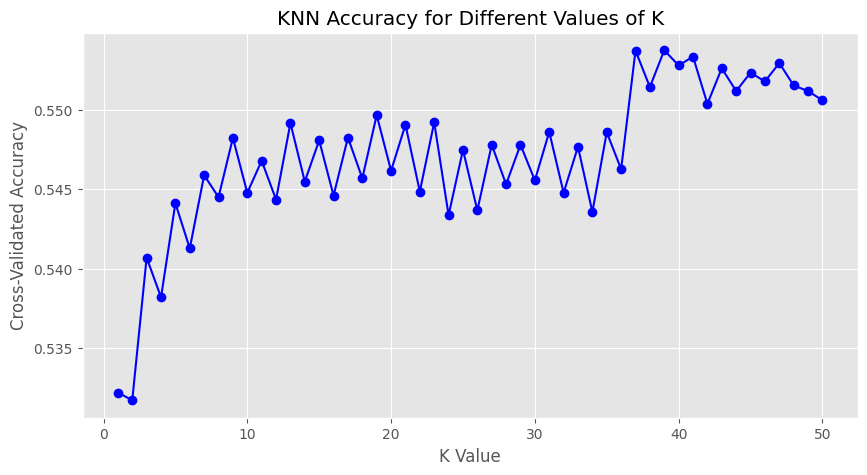

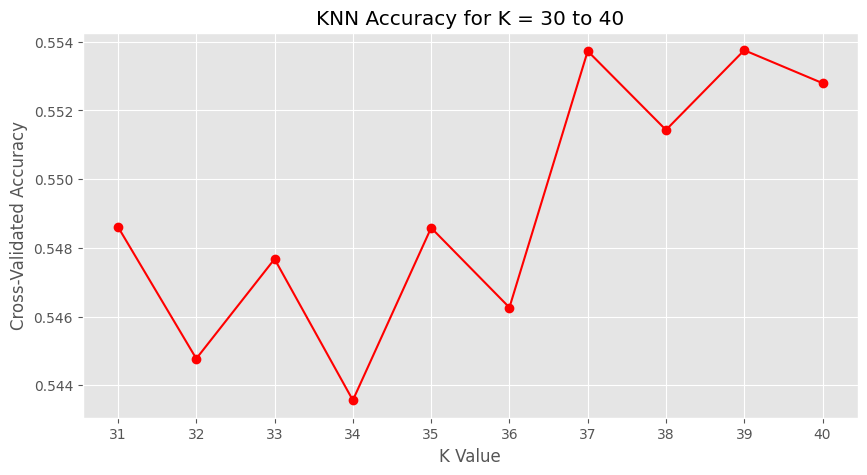

In [114]:
# Plotting accuracies for all evaluated k values
plt.figure(figsize=(10, 5))
plt.plot(Ks, Accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(Ks[30:40], Accuracies[30:40], marker='o', linestyle='-', color='r')
plt.title('KNN Accuracy for K = 30 to 40')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(Ks[30:40])
plt.grid(True)
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

k = 37
KNNmodel = KNeighborsClassifier(n_neighbors=k)
KNNmodel.fit(X_train, y_train)

y_pred_KNN = KNNmodel.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred_KNN))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred_KNN))

Accuracy =  0.5643208475217556
Confusion Matrix:
[[10538  5433]
 [ 8385  7360]]


**Interpretation:** 

The best k value is k = 37 with an accuracy of 56.43%

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data.Show the results of cross-validation along with best parameter at the end.


*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 4,500 articles. It takes multiple minutes to run on the whole dataset.

In [8]:
# Build SVM classifier using the 4500 samples from training dataset
Cs = np.linspace(1, 10, 10)
Accuracies = np.zeros(Cs.shape[0])    
for i,C in enumerate(Cs):
    SVMmodel = svm.SVC(kernel='rbf', C=C)
    scores = cross_val_score(estimator=SVMmodel, X=X[:4500], y=y[:4500], cv=5, scoring='accuracy')
    Accuracies[i] = scores.mean()

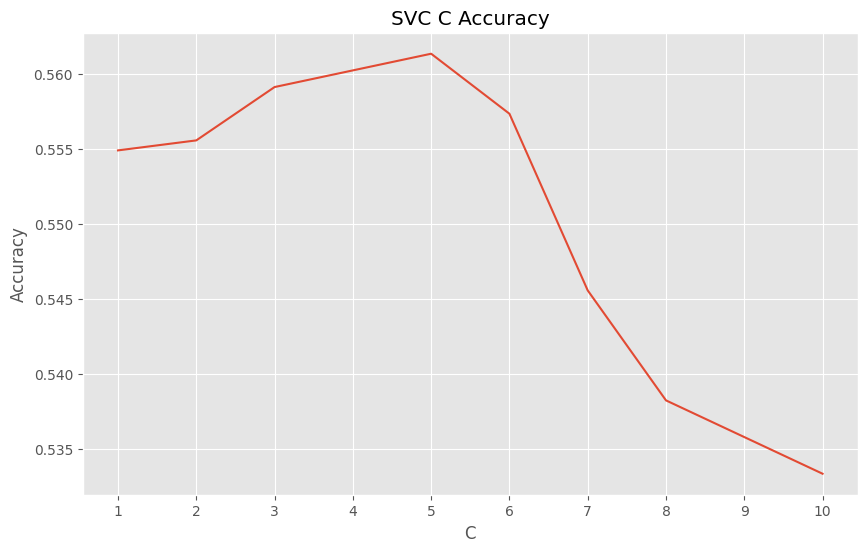

In [10]:
# Plot the accuracies for different values of C
plt.plot(Cs, Accuracies)
plt.title('SVC C Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.xticks(Cs)
plt.show()


In [11]:
# Create a SVM model with the best value of C
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

model = svm.SVC(kernel='rbf', C=5, gamma = 'scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Accuracy =  0.5516143271534872
Confusion Matrix:
[[11808  4163]
 [10058  5687]]


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 
Show the results of cross-validation along with best parameter at the end.
We don't need a plot here, we only need cross validation output and the optimal setting of parameters.

In [ ]:
# your solution goes here

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
    1. How did different parameters influence the accuracy?
    2.  Which model is easiest do interpret?
    3. How would you interpret your results?


**Your Solution:** TODO